In [ ]:
# from google.colab import drive

# drive.mount('/content/drive')

In [3]:
conda install opencv

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
# import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.models import Sequential
from keras.layers import Dense ,Conv2D ,MaxPooling2D ,Dropout ,Flatten,AveragePooling2D 
from keras import optimizers , regularizers 
from keras.models import Model
# from keras.applications.resnet50 import preprocess_input,ResNet50 
from keras.applications.resnet import ResNet50
import cv2
import glob
from keras.preprocessing.image import load_img ,img_to_array , array_to_img, ImageDataGenerator
from sklearn.metrics import confusion_matrix,multilabel_confusion_matrix
# from google.colab.patches import cv2_imshow
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

In [7]:
# Directory
#maindirectory = "D:/Github/Covid-Xray-Group11/COVID-19_Radiography_Dataset"
#tf.__version__

In [10]:
# Directory (Wilson's MAC)
maindirectory = "/Users/yzu1032672/Desktop/GitHub/Covid-Xray-Group11/COVID-19_Radiography_Dataset"
tf.__version__

'2.6.0'

Data Preprocessing

In [11]:
img_height = 50
img_width = 50
batch_size = 32

In [12]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(maindirectory,labels='inferred',
                                                    label_mode= "categorical",
                                                    # color_mode= "grayscale",
                                                    subset="training",
                                                    image_size=(img_height, img_width), 
                                                    validation_split=0.3,
                                                    batch_size = batch_size,
                                                    seed = 646)

Found 21165 files belonging to 4 classes.
Using 14816 files for training.


In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(maindirectory,
                                                     validation_split=0.3,
                                                     label_mode= "categorical",
                                                     subset="validation",
                                                     # color_mode= "grayscale",
                                                     seed=646,
                                                     image_size=(img_height, img_width),
                                                     batch_size=batch_size)

Found 21165 files belonging to 4 classes.
Using 6349 files for validation.


In [14]:
class_names = train_ds.class_names
print(class_names)

['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']


In [15]:
len(class_names)

4

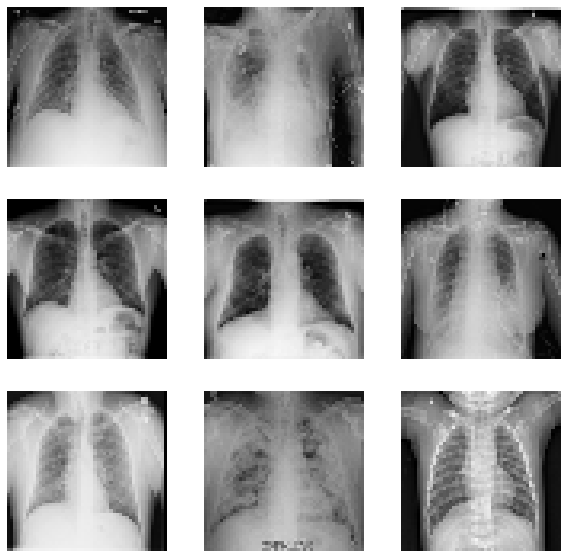

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    # plt.title(class_names[labels[[i]]])
    plt.axis("off")

In [17]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 50, 50, 3)
(32, 4)


In [18]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
# normalization_layer = layers.Rescaling(1./255)

In [ ]:
# normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
# image_batch, labels_batch = next(iter(normalized_ds))
# first_image = image_batch[0]
# # Notice the pixel values are now in `[0,1]`.
# print(np.min(first_image), np.max(first_image))

# CNN model

In [19]:
num_classes = len(class_names)
print(num_classes)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),

])

4


In [20]:
model.add(tf.keras.layers.Dense(units=num_classes, activation='softmax'))

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 50, 50, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 25, 25, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [23]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
463/463 [==============================] - 46s 72ms/step - loss: 0.7664 - accuracy: 0.6907 - val_loss: 0.6029 - val_accuracy: 0.7707
Epoch 2/10
463/463 [==============================] - 29s 62ms/step - loss: 0.5606 - accuracy: 0.7800 - val_loss: 0.5382 - val_accuracy: 0.7940
Epoch 3/10
463/463 [==============================] - 28s 61ms/step - loss: 0.4832 - accuracy: 0.8158 - val_loss: 0.4952 - val_accuracy: 0.7997
Epoch 4/10
463/463 [==============================] - 30s 64ms/step - loss: 0.4391 - accuracy: 0.8355 - val_loss: 0.4292 - val_accuracy: 0.8376
Epoch 5/10
463/463 [==============================] - 29s 62ms/step - loss: 0.4003 - accuracy: 0.8517 - val_loss: 0.4117 - val_accuracy: 0.8463
Epoch 6/10
463/463 [==============================] - 29s 62ms/step - loss: 0.3705 - accuracy: 0.8614 - val_loss: 0.3746 - val_accuracy: 0.8619
Epoch 7/10
463/463 [==============================] - 28s 60ms/step - loss: 0.3488 - accuracy: 0.8711 - val_loss: 0.4016 - val_accuracy:

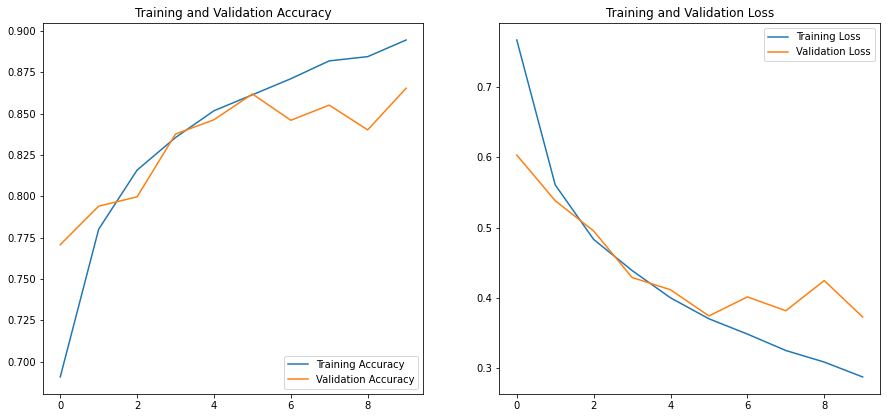

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Resnet50 model

In [ ]:
#Add new classification layer to resnet50
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height,img_width,3))
model2 = Sequential()

model2 = restnet()
model2.add(tf.keras.layers.Rescaling(1./255,input_shape=(img_height, img_width, 3), offset=0.0))

model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(49, activation='softmax'))
model2.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',metrics=['accuracy'])
model2.summary()

In [ ]:
# #Train
# STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
# STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model2.fit(train_ds,
  validation_data=val_ds,
  epochs=1
)

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Another methodology of preprocessing

In [ ]:
train = []
train_labels = []


for images, labels in train_ds.take(1):
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

    image = cv2.resize(numpy_images,(img_height,img_height))
    train.append(image)
    train_labels.append(numpy_labels)